In [38]:
file = "../Ingestione dei dati in Apache Spark - Zeppelin (2).html"
file = open(file, encoding="utf-8")
content = file.read()

'\ufeff<!DOCTYPE html><html ng-controller="MainCtrl" class="no-js ng-scope"><head>\n<base href="http://localhost:8080/#/notebook/2FHSPQDVT">\n<link rel="icon" data-savepage-href="" href=""><style type="text/css">[uib-typeahead-popup].dropdown-menu { display: block; }\n</style><style type="text/css">.uib-time input { width: 50px; }\n</style><style type="text/css">[uib-tooltip-popup].tooltip.top-left > .tooltip-arrow, [uib-tooltip-popup].tooltip.top-right > .tooltip-arrow, [uib-tooltip-popup].tooltip.bottom-left > .tooltip-arrow, [uib-tooltip-popup].tooltip.bottom-right > .tooltip-arrow, [uib-tooltip-popup].tooltip.left-top > .tooltip-arrow, [uib-tooltip-popup].tooltip.left-bottom > .tooltip-arrow, [uib-tooltip-popup].tooltip.right-top > .tooltip-arrow, [uib-tooltip-popup].tooltip.right-bottom > .tooltip-arrow, [uib-tooltip-html-popup].tooltip.top-left > .tooltip-arrow, [uib-tooltip-html-popup].tooltip.top-right > .tooltip-arrow, [uib-tooltip-html-popup].tooltip.bottom-left > .tooltip-ar
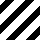
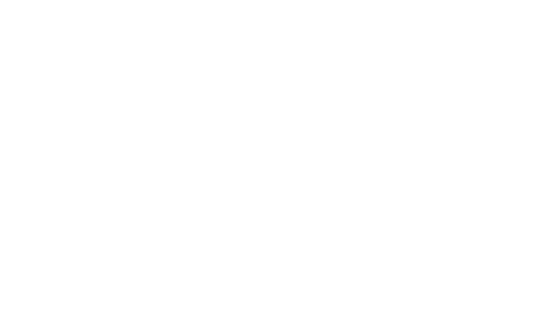
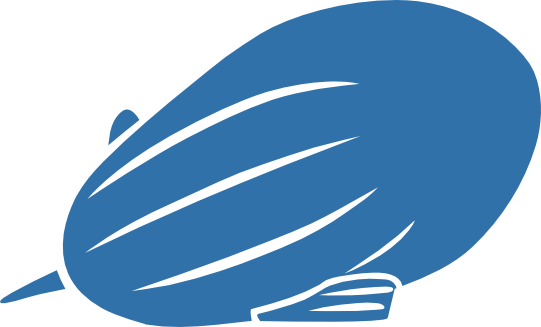

In [39]:
content

In [40]:
from bs4 import BeautifulSoup

# products=[] #List to store name of the product
# prices=[] #List to store price of the product
# ratings=[] #List to store rating of the product

soup = BeautifulSoup(content)

# for container in soup.findAll('div', attrs={'class':'ng-scope paragraph'}):
#     for scopet in container.findall('div', attrs = {'class': 'ng-scope'}):
#         print(scopet)


In [41]:
import re

In [42]:
zuppa_container = soup.findAll('div', attrs={'class': re.compile('ng-scope paragraph-col')})

In [43]:
stripped_down_code = []
for zuppa in zuppa_container:
    toAppend1 = zuppa.find_all('div', attrs = {'class': 'markdown-body'})
#     if len(toAppend)>1:
#         raise Exception('più di un tag nel container')
    toAppend2 = zuppa.find_all('div', attrs = {'class': 'ace_layer ace_text-layer'})
#     if len(toAppend)>1:
#         raise Exception('più di un tag nel container')
    toAppend3 = zuppa.find_all('div', attrs = {'class': 'text plainTextContent'})
#     if len(toAppend1)>1:
#         raise Exception('più di un tag nel container')
    if len(toAppend1)>0:
        for toAp in toAppend1:
            stripped_down_code.append(str(toAp)+'\n')
    if len(toAppend2)>0:
        for toAp in toAppend2:
            stripped_down_code.append(str(toAp)+'\n')
    if len(toAppend3)>0:
        for toAp in toAppend3:
            stripped_down_code.append(str(toAp)+'\n')

# stripped_down_code

In [44]:
def remove_ace_line_div(txt):
    
    matches = re.findall('(<div class=\"ace_line\" style=\"[\w\W]+?">[\w\W]*?</div>)', txt)
    for match in matches:
        txt = txt.replace(match, match.replace('</div>','\n'))
#         print(txt)
    match = []
    match.append(re.findall('(<div class=\"ace_line\" style=\"[\w\W]+?">)', txt))

    if len(match[0])>0:
        match.append(re.findall('(</div>)', txt))
        match.append(re.findall('(<span class=\"ace_identifier\">)', txt))
        match.append(re.findall('(<span class=\"ace_keyword\">)', txt))
        match.append(re.findall('(<span class=\"ace_string\">)', txt))
        match.append(re.findall('(<span class=\"ace_keyword ace_operator\">)', txt))
        match.append(re.findall('(<span class=\"ace_paren ace_lparen\">)', txt))
        match.append(re.findall('(<span class=\"ace_paren ace_rparen\">)', txt))
        match.append(re.findall('(<span class=\"ace_symbol ace_constant\">)', txt))
        match.append(re.findall('(<span class=\"ace_constant ace_numeric\">)', txt))
        match.append(re.findall('(<span class=\"ace_indent-guide\">)', txt))
        match.append(re.findall('(<span class=\"ace_comment">)', txt))
        match.append(re.findall('(<span class=\"ace_support ace_function">)', txt))
        match.append(re.findall('(<span class=\"">)', txt))
        match.append(re.findall('(<span class=\"">)', txt))
        
        match.append(re.findall('(<div class=\"ace_layer ace_text-layer\" style=\"[\w\W]+?\">)', txt))
        match.append(re.findall('(<div class=\"ace_line_group\" style=\"[\w\W]+?\">)', txt))
        match.append(re.findall('(</span>)', txt))

        for match_row in match:
            for txt_match in match_row:
                txt = txt.replace(txt_match, '')
    #             print('removing ace line...\n')
#         txt = '[code lang="scala"]' + txt + '[/code]'
        txt = '<pre class="EnlighterJSRAW" data-enlighter-language="java">' + txt + '</pre>'

    return txt

In [45]:
def remove_text_plain(html):
    match = []
    match.append(re.findall('<div class=\"text plainTextContent\" id=\"[\w\W]+? style=\"[\w\W]+?\">', html))
    if len(match[0])>0:
        match.append(re.findall('(</div>)', html))
        for match_row in match:
            for txt_match in match_row:
                html = html.replace(txt_match, '')
        html = '<pre class="desktopcmd">' + html + '</pre>'
        html = html.replace('-','&#x2212;')
#         html = html.replace('\n','<br>')
#        html = html.replace('&gt;','>')
    return html

In [46]:
for idx,txt in enumerate(stripped_down_code):
    stripped_down_code[idx] = remove_ace_line_div(stripped_down_code[idx])
    stripped_down_code[idx] = remove_text_plain(stripped_down_code[idx])

In [47]:
stripped_down_code_flat = ''.join(stripped_down_code)
# stripped_down_code_flat

In [48]:
stripped_down_code_flat = stripped_down_code_flat.replace("&gt;", ">")

In [49]:
stripped_down_code_flat

'<div class="markdown-body">\n<p>Con Apache Spark ho la possibilità di caricare in memoria grosse quantità di dati di diverso formato, csv, txt, json etc.</p>\n<p>I dati vengono memorizzati in un dataset o in un dataframe e successivamente processati. </p>\n<p>Ci sono diverse strategie per l’ingestione di uno o più file di dati in Apache Spark:</p>\n<ol>\n<li>leggere il file come un file di testo, i dati su ciascuna riga vengono memorizzati come una unica stringa, dalla quale posso estrarre le informazioni che mi interessano per inserirle nelle diverse colonne di un dataframe.</li>\n<li>leggere il file come un file csv, fornendo uno <code>schema</code> o lasciando che Spark intuisca da solo lo schema da applicare</li>\n<li>definire una classe corrispondente ai dati da memorizzare, leggere il file e forzare il casting dei dati alla classe definita</li>\n</ol>\n<p>Vediamo come procedere in ciascuno dei tre casi.</p>\n<h2>Leggere come file di testo</h2>\n</div>\n<pre class="EnlighterJSRAW

In [50]:
txt.replace('&gt;','>')

'<div class="ace_layer ace_text-layer" style="padding: 0px 4px;"><div class="ace_line_group" style="height:14px"><div class="ace_line" style="height:14px"></div></div></div>\n'

## prepare post
### import library - define user

In [51]:
import requests
import json
import base64

In [52]:
user = 'antozamm'
pythonapp = '8PbW e3Li Ejnv j9J2 Hgrd 3Ek0'
url = 'https://www.1week4.com/wp-json/wp/v2'

### codify user and password

In [53]:
token = base64.standard_b64encode((user + ':' + pythonapp).encode("utf-8"))
headers = {'Authorization': 'Basic ' + str(token, "utf-8")}

### prepare post

with open('prova.txt') as file:
    body = file.read()


body = ' <div> <style scoped="" type="text/css">.dataframe tbody tr th:only-of-type { vertical-align: middle; } </style> </div>'

In [54]:
body = stripped_down_code_flat

excerpt = 'Con Apache Spark ho la possibilità di caricare in memoria grosse quantità di dati di diverso formato, csv, txt, json etc. I dati vengono memorizzati in un dataset o in un dataframe e successivamente processati. Vediamo cosa fare per caricare uno o più file di dati in un dataframe in Apache Spark, e successivamente ripulire i dati.'
post = {'date': '2020-08-11T19:49:50',
        'title': 'ingestione di dati da un file testo in Apache Spark',
        'slug': 'ingestione-dati-apache-spark',
        'status': 'draft',
        'content': body,
        'author': '2',
        'excerpt': excerpt,
        'format': 'standard',
        'template': 'page-blog-az.php',
        'categories':'23', #big-data=23 #machine-learning=7 #scala=
        }
# body

### publish new post

In [55]:
headers = {'Authorization': 'Basic ' + str(token, "utf-8")}
r = requests.post(url + '/posts', headers=headers, json=post)
print('Your post is published on ' + json.loads(r.content, encoding="utf-8")['link'])

Your post is published on https://www.1week4.com/?p=44151


### update old post

# body = "[code lang=\"scala\"]val df = spark.range(1,25).map(x => (x, x*x))df.filter(a => a._1>10).show(5)[/code]"
body = "<p class=\"desktopcmd\">+&#x2212;&#x2212;&#x2212;+\n\
| id|\
+&#x2212;&#x2212;&#x2212;+\n| 21|\n| 22|\n| 23|\n| 24|\n+&#x2212;&#x2212;&#x2212;+\n</p>"

updatepost = { 'content': body }

postid = "43909"

updatedpost = requests.post(url + '/posts/' + postid, headers=headers, json=updatepost)
print('The updated post is published on \n' + json.loads(updatedpost.content, encoding="utf-8")['link'])

In [48]:
print(body)

<div class="markdown-body">
<h2>FILTER signature #1</h2>
<p>La funzione filter ha diverse signature, questo significa che la funzione puà essere chiamata con diversi parametri.</p>
<p>La prima funzione è:<br/><code>def filter(func: (T) ⇒ Boolean): Dataset[T]</code></p>
<p>In questo caso devo passare una funzione che ritorna un valore di tipo boolean. </p>
<p>La funzione può essere definita esplicitamente (def funzione(A): Boolean) oppure può essere una funzione anonima. </p>
<h4>Esempio #1:</h4>
<p>usiamo una funzione anonima. La funzione che passo è: <code>x => x>20</code> in cui ogni elemento viene confrontato con il numero 20. Il risultato è ovviamente <strong>true</strong> o <strong>false</strong>.</p>
</div>
<pre class="EnlighterJSRAW" data-enlighter-language="java">spark.range(1, 25).filter( x => x>20 ).show

</pre><pre class="desktopcmd">+&#x2212;&#x2212;&#x2212;+
| id|
+&#x2212;&#x2212;&#x2212;+
| 21|
| 22|
| 23|
| 24|
+&#x2212;&#x2212;&#x2212;+


</pre><div class="markdown-bod